Load required libraries

In [116]:
## data wrangling
import os as os
import pandas as pd
import numpy as np

##visualisation
import seaborn as sns
import matplotlib.pyplot as plt

##Chi test
from scipy.stats import chi2_contingency

##machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Load data 

In [117]:
## Set data path
os.chdir("C:/Users/Garima/Downloads/Edwisor/Project Customer Churn")

## Load data 
train_set = pd.read_csv("Train_data.csv")
test_set = pd.read_csv("Test_data.csv")

In [118]:
##merge train and test set into single data set 
data_set = pd.DataFrame(train_set)
data_set = data_set.append(test_set)

Familiarise with the structure and distribution of data

In [119]:
data_set.head(15)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [120]:
## summary of data set 
data_set.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [121]:
##data type of the columns
data_set.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [122]:
## Feature Engineering
#data_set["total_calls"] = data_set["total day calls"] + data_set["total eve calls"] + data_set["total night calls"] + data_set["total intl calls"]
#data_set["total_charge"] = data_set["total day charge"] + data_set["total eve charge"] + data_set["total night charge"] + data_set["total intl charge"]
#data_set["day rate"] = data_set["total day minutes"]/data_set["total day charge"] 
#data_set["eve rate"] = data_set["total eve minutes"]/data_set["total eve charge"] 
#data_set["night rate"] = data_set["total night minutes"]/data_set["total night charge"] 
#data_set["intl rate"] = data_set["total intl minutes"]/data_set["total intl charge"] 

In [123]:
##Create levels for categorical data
for i in range(0,data_set.shape[1]):
    if(data_set.iloc[:,i].dtypes == 'object'):
        data_set.iloc[:,i] = pd.Categorical(data_set.iloc[:,i])
        data_set.iloc[:,i] = data_set.iloc[:,i].cat.codes
        data_set.iloc[:,i] = data_set.iloc[:,i].astype('object')

In [124]:
## Missing value analysis 
## no missing value in the data set
data_set.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

 Visualisations and data distribution 

In [125]:
## feature wise churn table and their barplot for some categorical features
def feature_wise_churn(column_name,data_set):
    churn_percent = (((pd.crosstab(data_set[column_name],data_set["Churn"])[1])/((pd.crosstab(data_set[column_name],data_set["Churn"])[1]) + (pd.crosstab(data_set[column_name],data_set["Churn"])[0]))*100))
    churn_percent = churn_percent.reset_index()
    churn_percent = churn_percent.rename(columns = {column_name: column_name, 0: 'Churn Rate'})
    churn_percent = churn_percent.sort_values("Churn Rate",ascending=False).reset_index(drop = True)
    return churn_percent

state
    state  Churn Rate
0      31   26.470588
1       4   26.470588
2      43   25.000000
3      20   24.285714
4      40   23.333333
5      22   21.917808
6      25   21.538462
7      33   21.212121
8      47   21.212121
9      21   20.967742
10     26   20.588235
11      2   20.000000
12     16   18.571429
13     34   18.072289
14     23   17.857143
15     38   17.777778
16     19   16.923077
17      6   16.216216
18     27   16.176471
19     30   16.071429
20     10   14.814815
21      8   14.754098
22     36   14.754098
23     37   14.102564
24     44   13.888889
25      5   13.636364
26     17   13.559322
27     41   13.333333
28     35   12.820513
29      9   12.698413
30     15   12.676056
31     13   12.328767
32     50   11.688312
33     24   11.111111
34     46   10.958904
35      1   10.000000
36     32    9.677419
37     28    9.677419
38     49    9.433962
39     42    9.433962
40      7    9.259259
41     39    9.230769
42     48    8.974359
43     14    8.620690
44  

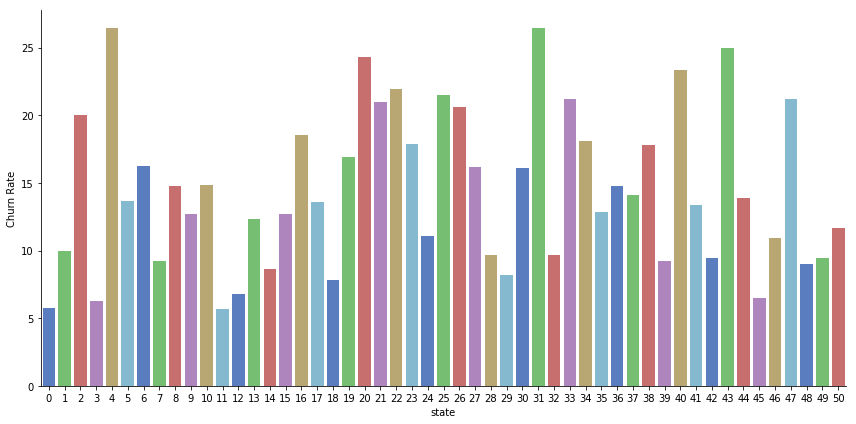

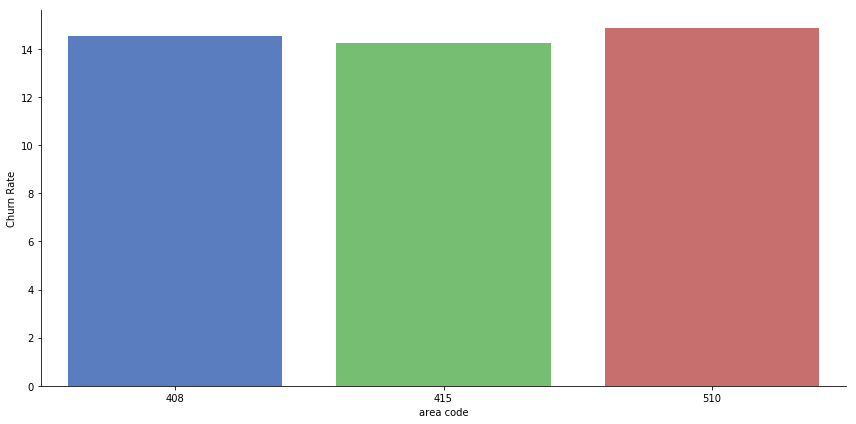

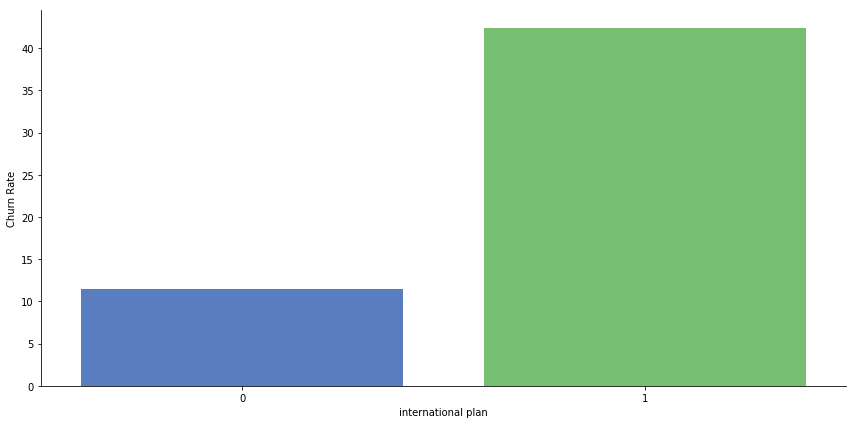

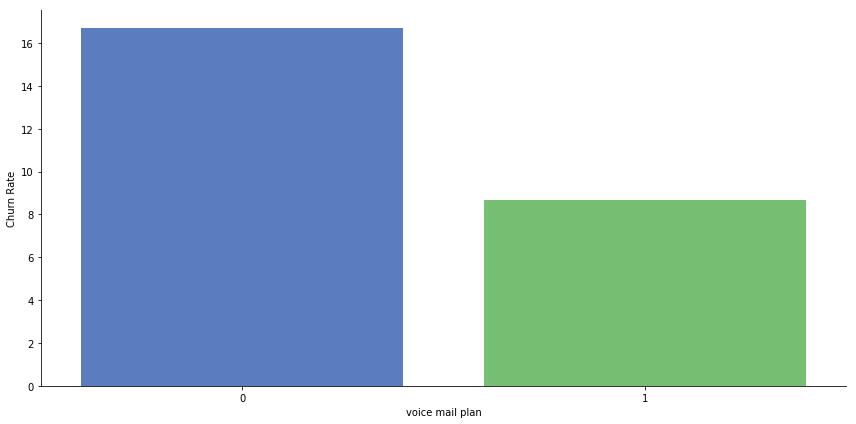

In [126]:
train_set = data_set[0:train_set.shape[0]]
for i in ("state","area code","international plan","voice mail plan"):
    print(i)
    churn_rate_percent = feature_wise_churn(i,train_set)
    print(churn_rate_percent)
    sns.factorplot(i,"Churn Rate", data=churn_rate_percent, kind="bar", size=6, aspect=2, palette="muted", legend=True)

plt.show()

C:\Users\Garima\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


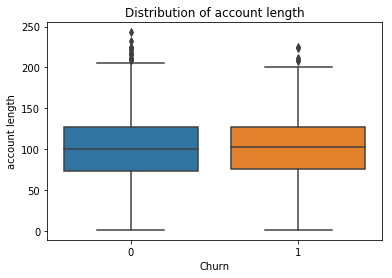

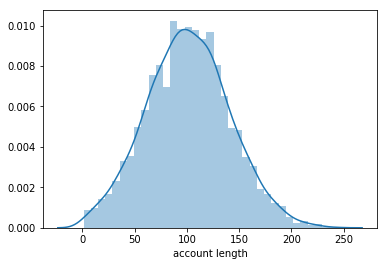

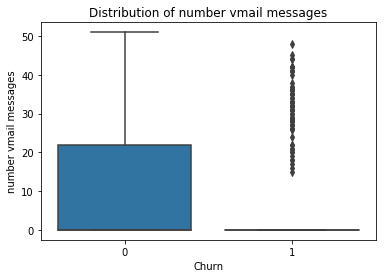

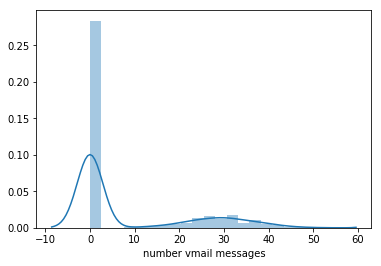

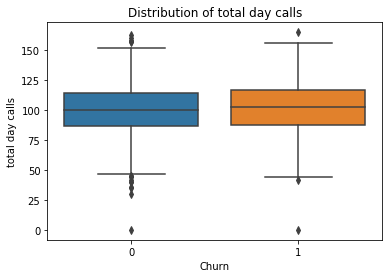

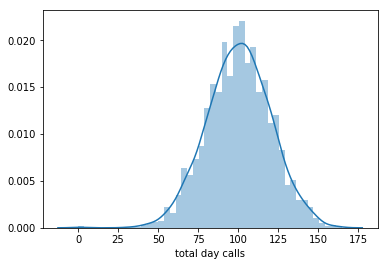

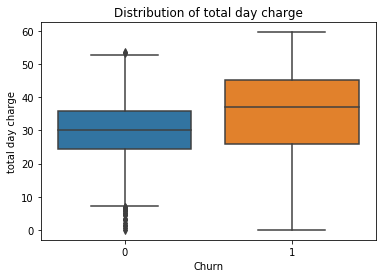

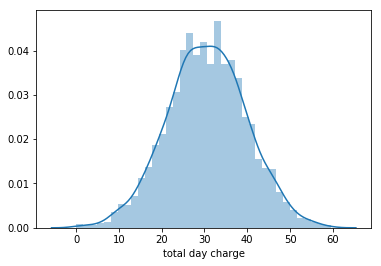

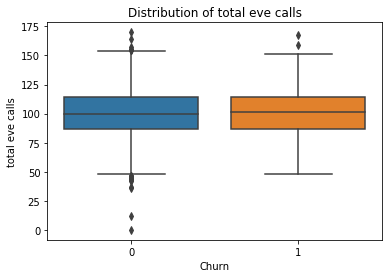

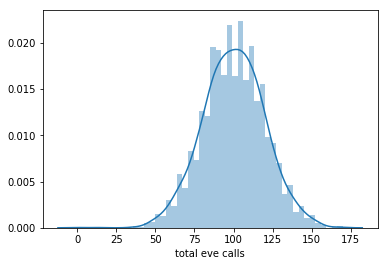

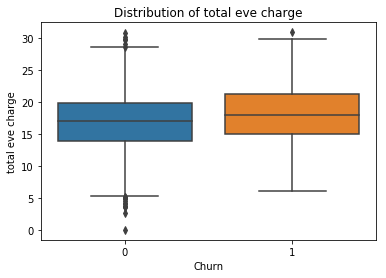

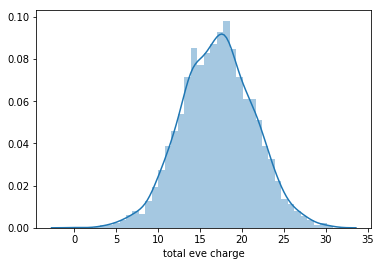

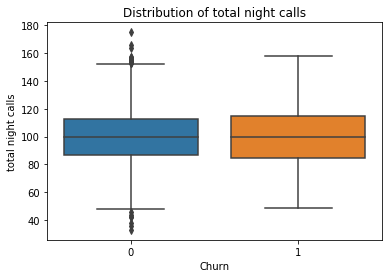

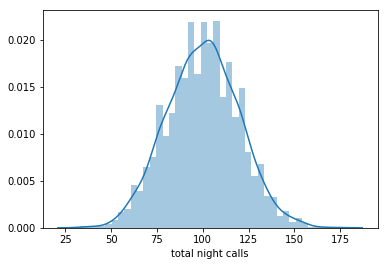

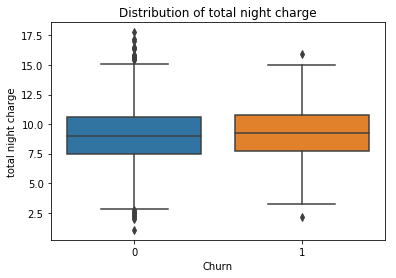

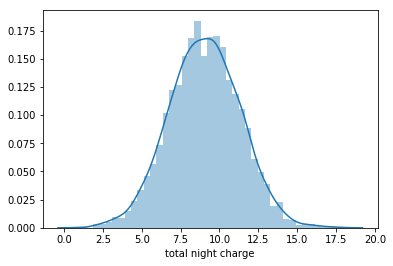

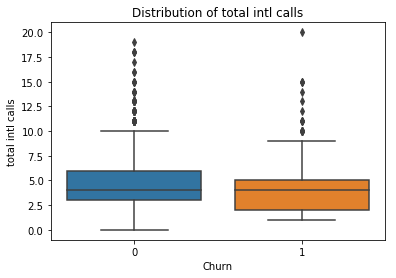

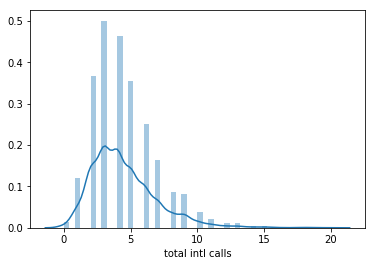

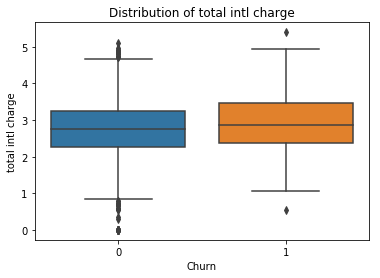

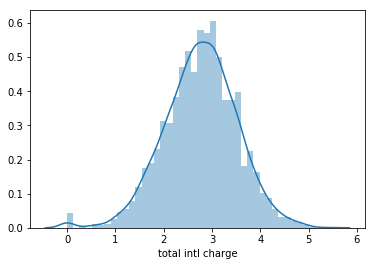

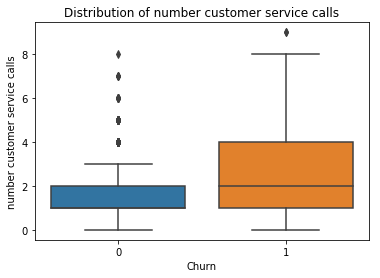

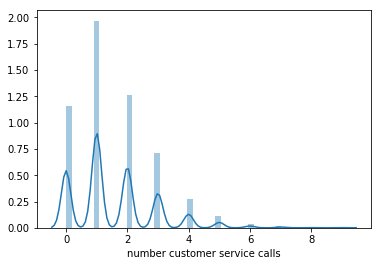

In [127]:
## plot frequency distribution of some numerical features and their boxplot according to Churn
for i in ("account length","number vmail messages","total day calls","total day charge","total eve calls","total eve charge","total night calls","total night charge","total intl calls","total intl charge","number customer service calls"):
    #print(i)
    plt.figure()
    sns.boxplot(train_set["Churn"],train_set[i]).set_title("Distribution of" + " "+ i)
    plt.figure()
    sns.distplot(train_set[i])
    
plt.show()

account length
-8.0
208.0
number vmail messages
-25.5
42.5
total day minutes
34.95
324.95
total day calls
48.0
152.0
total day charge
5.95
55.23
total eve minutes
64.7875
335.6875
total eve calls
46.5
154.5
total eve charge
5.5
28.54
total night minutes
65.2
336.4
total night calls
48.0
152.0
total night charge
2.935
15.135

C:\Users\Garima\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



total intl minutes
3.25
17.25
total intl calls
-1.5
10.5
total intl charge
0.89
4.65
number customer service calls
-0.5
3.5


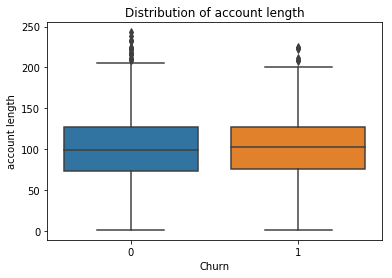

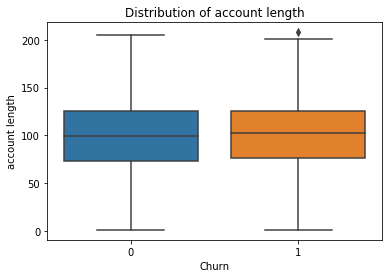

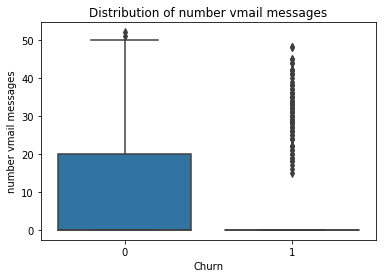

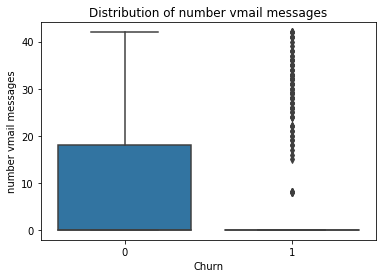

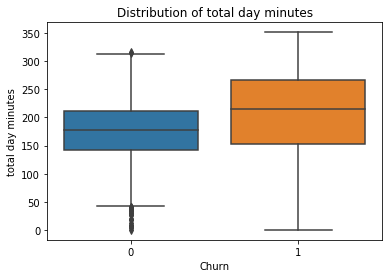

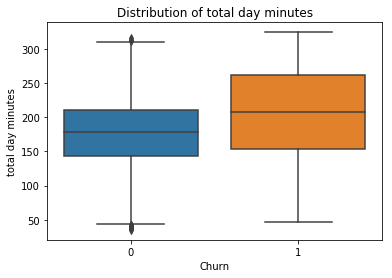

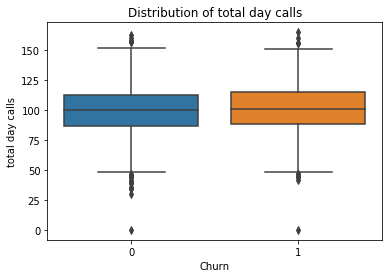

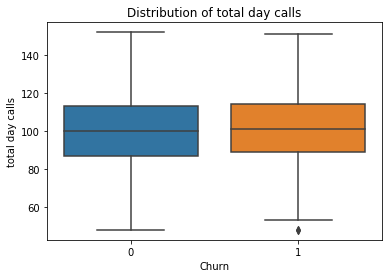

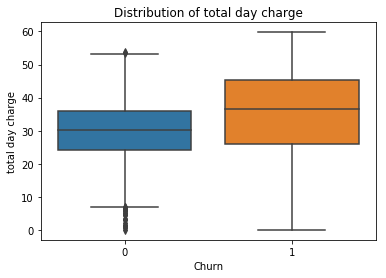

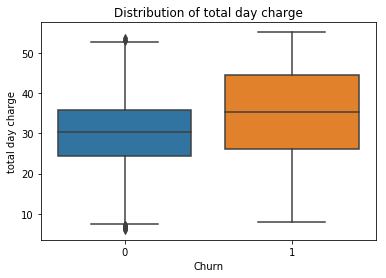

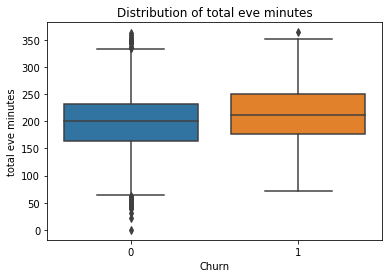

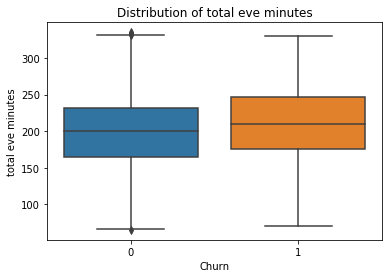

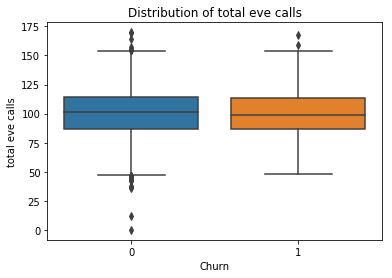

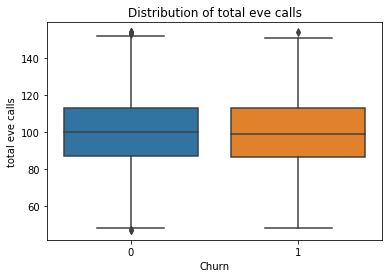

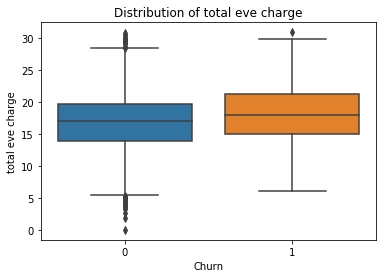

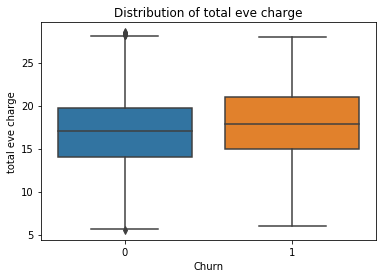

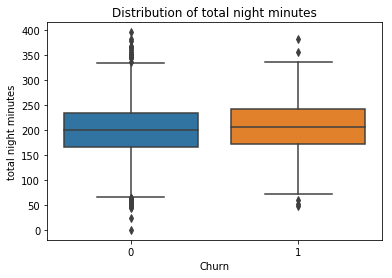

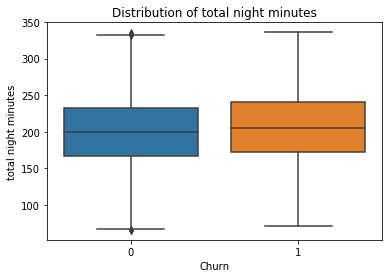

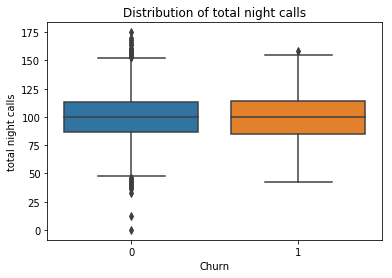

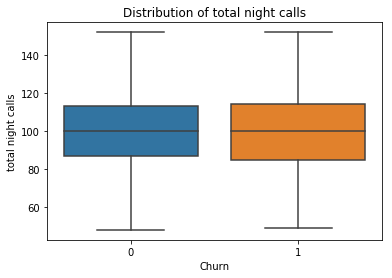

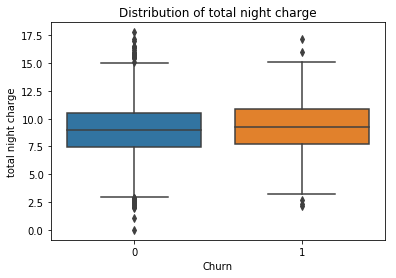

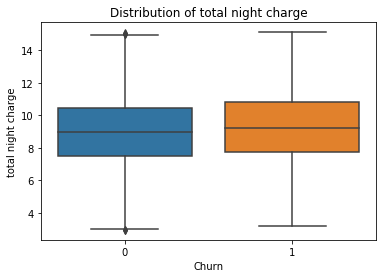

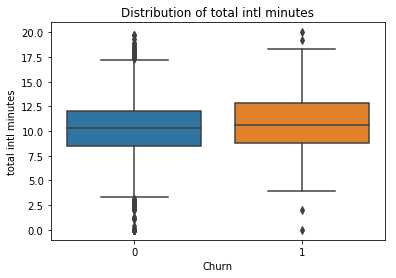

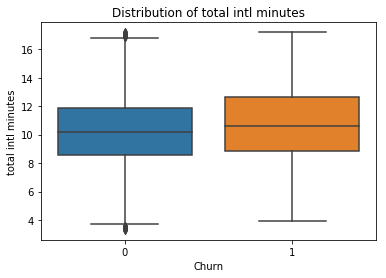

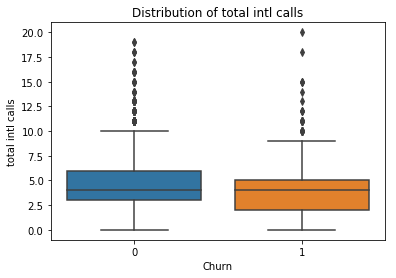

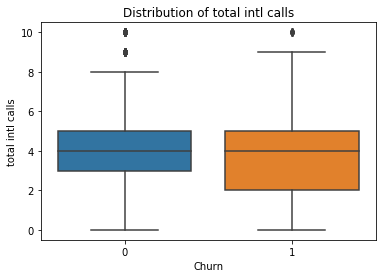

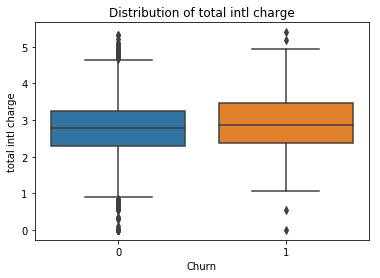

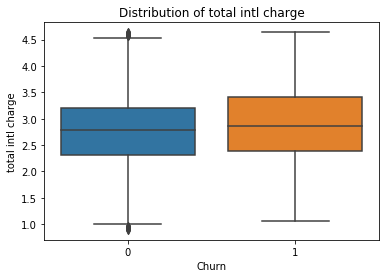

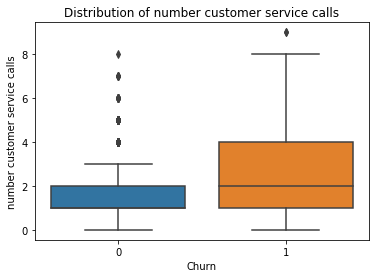

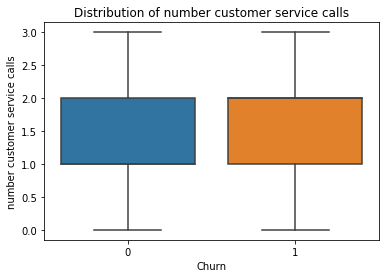

In [128]:
##Detect and replace outliers from data with mean
for i in ("account length","number vmail messages","total day minutes","total day calls","total day charge","total eve minutes","total eve calls","total eve charge","total night minutes","total night calls","total night charge","total intl minutes","total intl calls","total intl charge","number customer service calls"):
    print(i)
    q75, q25 = np.percentile(data_set.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    plt.figure()
    sns.boxplot(data_set["Churn"],data_set[i]).set_title("Distribution of" + " "+ i)
    data_set.loc[data_set[i] < min,i] = round(np.mean(data_set[i]))
    data_set.loc[data_set[i] > max,i] = round(np.mean(data_set[i]))
    
    plt.figure()
    sns.boxplot(data_set["Churn"],data_set[i]).set_title("Distribution of" + " "+ i)


plt.show()

# Feature Selection 

                               account length  area code  \
account length                       1.000000  -0.019999   
area code                           -0.019999   1.000000   
number vmail messages               -0.010259  -0.001772   
total day minutes                   -0.005981  -0.021682   
total day calls                      0.025221  -0.020635   
total day charge                    -0.006000  -0.021598   
total eve minutes                   -0.012679  -0.000184   
total eve calls                      0.014365  -0.011377   
total eve charge                    -0.012105  -0.000457   
total night minutes                 -0.004991   0.002385   
total night calls                   -0.004599   0.007251   
total night charge                  -0.005011   0.002386   
total intl minutes                   0.016016  -0.003630   
total intl calls                     0.019959   0.003234   
total intl charge                    0.016702  -0.003722   
number customer service calls       -0.0

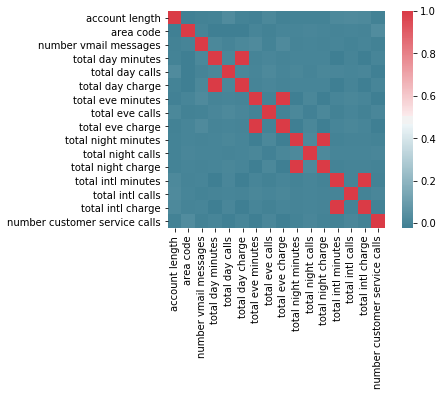

In [129]:
##Feature selection 
## Correlation analysis 
data_set_corr = data_set.corr()
print(data_set_corr)
## drop total day minutes,total eve minutes,total night minutes,total intl minutes

#Plot using seaborn library
%matplotlib inline
sns.heatmap(data_set_corr, mask=np.zeros_like(data_set_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [131]:
## Variance inflation factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = pd.DataFrame(data_set[["account length","number vmail messages","total day minutes","total day calls","total day charge","total eve minutes","total eve calls","total eve charge","total night minutes","total night calls","total night charge","total intl minutes","total intl calls","total intl charge","number customer service calls"]]
,dtype = float)
import statsmodels.api as sm
sm.add_constant(x)

for i in range(x.shape[1]):
    print(x.columns[i],variance_inflation_factor(x.values,i))



account length 7.34179063209
number vmail messages 1.32142692933
total day minutes 1408440.09142
total day calls 23.8744138722
total day charge 1408668.00623
total eve minutes 11770.2178351
total eve calls 23.3685569083
total eve charge 11755.9967517
total night minutes 5598506.31174
total night calls 23.4403660084
total night charge 5598390.28014
total intl minutes 6457.03532051
total intl calls 5.14118274931
total intl charge 6471.12096835
number customer service calls 3.0122024133


In [141]:
## chi square test 
## loop for chi square values
for i in ("state","area code","phone number","international plan","voice mail plan"):
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data_set["Churn"], data_set[i]))
    print(p)

##drop phone number ,area code

state
7.85083622437e-05
area code
0.754658138533
phone number
0.493350889587
international plan
1.9443947475e-74
voice mail plan
7.16450178099e-15


In [142]:
data_set = data_set.drop(["total day minutes","total eve minutes","total night minutes","total intl minutes","area code","phone number"],axis = 1)

In [143]:
## Let us see how representative is our train set data of customer churn
train_set = data_set[0:(train_set.shape[0])]
train_set.Churn.value_counts()
test_set = data_set[train_set.shape[0]:data_set.shape[0]]
## 483 out of 3333 observations show customer churn i.e around 14.49%

In [144]:
## Let us oversample our minority class in train data set 
#train_set_over = train_set[train_set["Churn"] == 1].sample(train_set.Churn.value_counts()[0], replace=True)
#train_set_over = pd.concat([train_set[train_set["Churn"] == 0], train_set_over], axis=0)
#train_set_over.Churn.value_counts()

In [145]:
x_train = train_set.drop("Churn",axis = 1)
y_train = train_set["Churn"].astype('int')
x_test = test_set.drop("Churn",axis = 1)
y_test = test_set["Churn"].astype('int')
#x_test = data_set.drop("Churn",axis = 1)[train_set.shape[0]+1:data_set.shape[0]]
#y_test = data_set["Churn"][train_set.shape[0]+1:data_set.shape[0]].astype('int')

In [146]:
#x_train = train_set_over.drop("Churn",axis = 1)
#y_train = train_set_over["Churn"].astype('int')
#x_test = data_set.drop("Churn",axis = 1)[train_set.shape[0]+1:data_set.shape[0]]
#y_test = data_set["Churn"][train_set.shape[0]+1:data_set.shape[0]].astype('int')

In [147]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3333, 14), (3333,), (1667, 14), (1667,))

# Model Development

In [148]:
#Model Development

## Logistic Regression 
model_LR = LogisticRegression()
modelLR_fit = model_LR.fit(x_train,y_train)
modelLR_predict = model_LR.predict(x_test)
model_LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
## Naive Bayes 
model_NB = GaussianNB()
modelNB_fit = model_NB.fit(x_train,y_train)
modelNB_predict = model_NB.predict(x_test)

In [150]:
## Knn 
model_KNN = KNeighborsClassifier(n_neighbors=5)
modelKNN_fit = model_KNN.fit(x_train,y_train)
modelKNN_predict = model_KNN.predict(x_test)
modelKNN_fit

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [151]:
## Decision Trees 
model_C50 = DecisionTreeClassifier()
modelC50_fit = model_C50.fit(x_train,y_train)
modelC50_predict = model_C50.predict(x_test)
modelC50_predict
modelC50_fit

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [152]:
## Random Forest 
model_RF = RandomForestClassifier(n_estimators=1000)
modelRF_fit = model_RF.fit(x_train,y_train)
modelRF_predict = model_RF.predict(x_test)
modelRF_predict
modelRF_fit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Model Evaluation

In [153]:
def model_evaluation(predict,actual):
    model_CM = pd.crosstab(actual,predict)
    print(model_CM)
    model_accuracy = (model_CM.iloc[0,0]+model_CM.iloc[1,1])/(model_CM.iloc[0,0]+model_CM.iloc[1,1]+model_CM.iloc[0,1]+model_CM.iloc[1,0])
    model_FNR = model_CM.iloc[1,0]/(model_CM.iloc[1,0]+model_CM.iloc[1,1])
    model_Precision = model_CM.iloc[0,1]/(model_CM.iloc[0,1]+model_CM.iloc[1,1])
    model_Recall = model_CM.iloc[1,1]/(model_CM.iloc[1,0]+model_CM.iloc[1,1])
    return model_accuracy,model_FNR,model_Precision,model_Recall

In [154]:
model_evaluation(y_test,modelLR_predict)

Churn     0    1
row_0           
0      1426  194
1        17   30


(0.87342531493701259,
 0.36170212765957449,
 0.8660714285714286,
 0.63829787234042556)

In [155]:
model_evaluation(y_test,modelNB_predict)

Churn     0    1
row_0           
0      1358  154
1        85   70


(0.85662867426514699, 0.54838709677419351, 0.6875, 0.45161290322580644)

In [156]:
model_evaluation(y_test,modelKNN_predict)

Churn     0    1
row_0           
0      1424  207
1        19   17


(0.86442711457708454,
 0.52777777777777779,
 0.9241071428571429,
 0.47222222222222221)

In [157]:
model_evaluation(y_test,modelC50_predict)

Churn     0    1
row_0           
0      1328  107
1       115  117


(0.86682663467306542,
 0.49568965517241381,
 0.47767857142857145,
 0.50431034482758619)

In [158]:
model_evaluation(y_test,modelRF_predict)

Churn     0    1
row_0           
0      1440  121
1         3  103


(0.92561487702459511,
 0.028301886792452831,
 0.5401785714285714,
 0.97169811320754718)

In [159]:
## Let us now give sample input to the model and produce the output
from sklearn.model_selection import train_test_split
sample_data_train,sample_data_test = train_test_split(test_set,test_size = 0.50)
sample_data_X = sample_data_train.drop(["Churn"],axis=1)
modelRF_predict = model_RF.predict(sample_data_X)
model_evaluation(sample_data_train["Churn"],modelRF_predict)

Churn    0   1
row_0         
0      723  59
1        1  50


(0.92797118847539017,
 0.019607843137254902,
 0.54128440366972475,
 0.98039215686274506)

In [160]:
sample_data_XY = sample_data_X
sample_data_XY["Churn"] = modelRF_predict
sample_data_XY.to_csv("Sample.csv")